<a href="https://colab.research.google.com/github/v-kr/Android/blob/master/Linear_Regression_with_Python_and_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression with Python and Numpy

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
%matplotlib inline
plt.style.use('seaborn')

In [ ]:
data = pd.read_csv('food_truck_data.txt')

In [ ]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


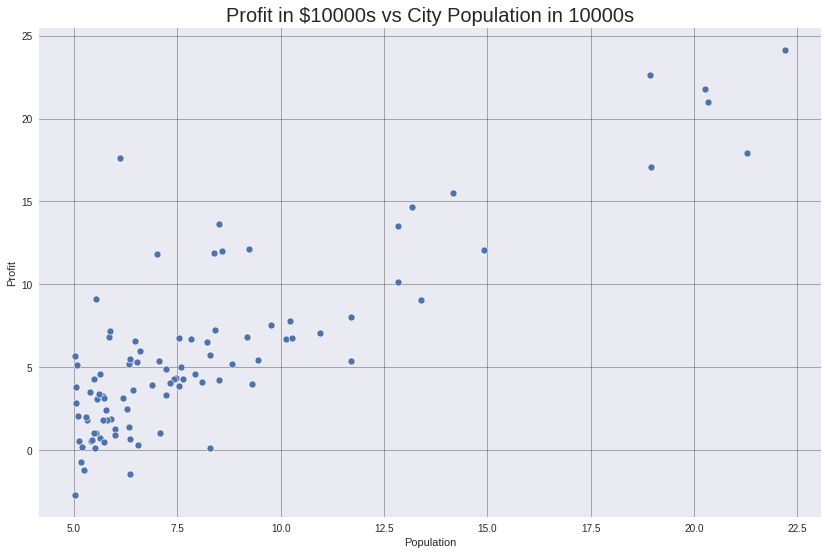

In [ ]:
plt.figure(figsize = (14,9))
ax = sns.scatterplot(x = 'Population', y = 'Profit', data = data)
ax.set_title('Profit in $10000s vs City Population in 10000s', fontsize = 20)
plt.grid(color = 'black', alpha = 0.3)
plt.show()

In [ ]:
def CostFunction(X, y, theta):
    m = len(y)
    yPred = X.dot(theta)
    error = (yPred - y)**2
    
    return 1/(2*m)*np.sum(error)

In [ ]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis = 1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

CostFunction(X, y, theta)

32.072733877455676

In [ ]:
def GradientDescent(X, y, theta, alpha, iteractions):
    m = len(y)
    costs = []
    for i in range(iteractions):
        yPred = X.dot(theta)
        error = np.dot(X.transpose(), (yPred - y))
        theta -= alpha*(1/m)*error
        costs.append(CostFunction(X, y, theta))
    return theta, costs

In [ ]:
theta, costs = GradientDescent(X, y, theta, alpha = 0.01, iteractions = 2000)

print('h(x) = {} + {}x1'.format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

costValues = np.zeros((len(theta0),len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = np.array([theta0[i], theta1[j]])
        costValues[i, j] = CostFunction(X, y, t)

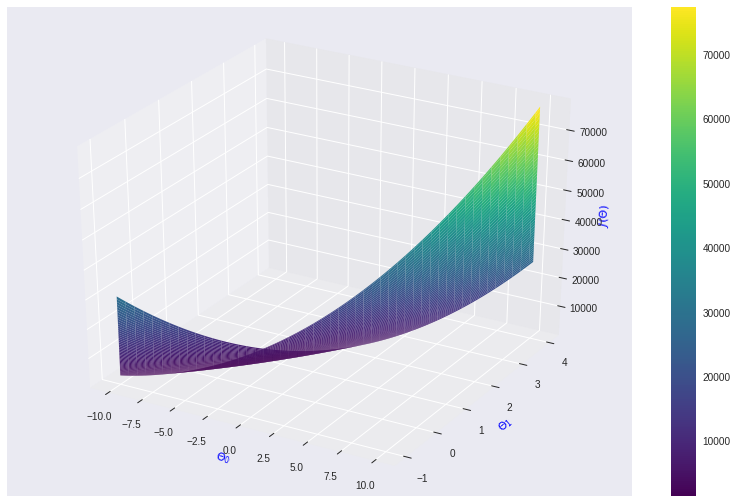

In [ ]:
fig = plt.figure(figsize = (14, 9))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta0, theta1, costValues, cmap = 'viridis')

fig.colorbar(surf, shrink = 1, aspect = 20)

plt.xlabel('$\Theta_0$', color = 'b')
plt.ylabel('$\Theta_1$', color = 'b')
ax.set_zlabel('$J(\Theta)$', color = 'b')

plt.show()

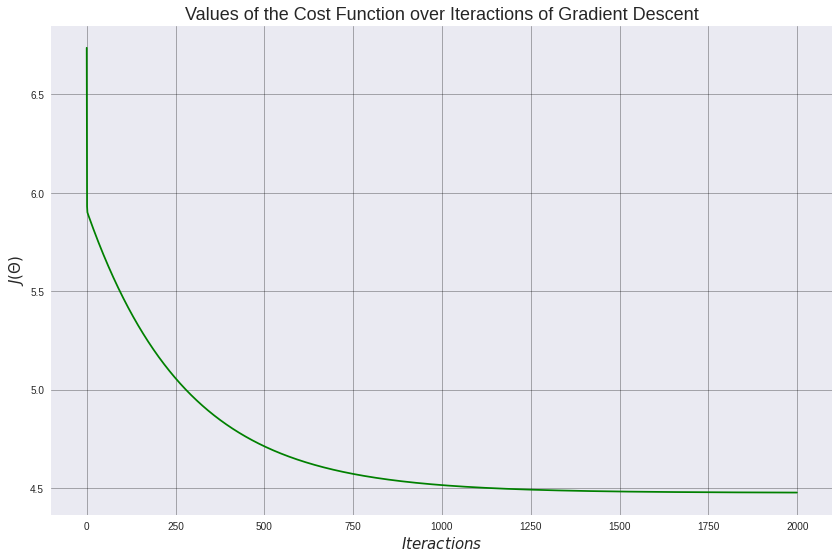

In [ ]:
plt.figure(figsize = (14, 9))
plt.plot(costs, 'g')
plt.grid(color = 'black', alpha = 0.3)
plt.xlabel('$Iteractions$', fontsize = 15)
plt.ylabel('$J(\Theta)$', fontsize = 15)
plt.title('Values of the Cost Function over Iteractions of Gradient Descent', fontsize = 18);

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[-3.78806857],
       [ 1.18221277]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


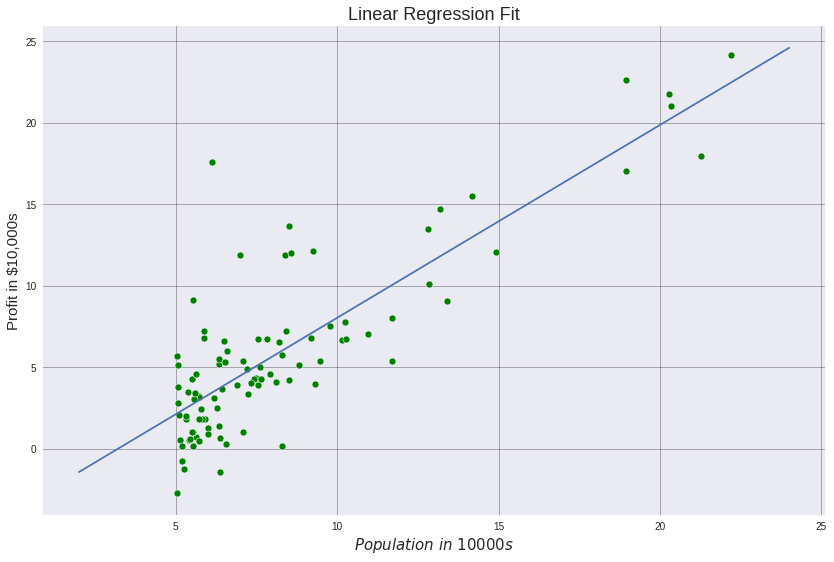

In [ ]:
plt.figure(figsize = (14, 9))

theta = np.squeeze(theta)
sns.scatterplot(x = 'Population', y = 'Profit', color = 'g', data = data)

xValue = [x for x in range(2,25)]
yValue = [(x*theta[1] + theta[0]) for x in xValue]
sns.lineplot(xValue, yValue)

plt.grid(color = 'black', alpha = 0.3)
plt.xlabel('$Population\ in\ 10000s$', fontsize = 15)
plt.ylabel('Profit in $10,000s', fontsize = 15)
plt.title('Linear Regression Fit', fontsize = 18);

In [ ]:
def Predict(x, theta):
    yPred = np.dot(theta.transpose(), x)
    return yPred

In [ ]:
yPred1 = Predict(np.array([1, 4]), theta)*10000
print('For a population of 40,000 people, the model predicts a profit of $' + str(round(yPred1, 0)))

For a population of 40,000 people, the model predicts a profit of $9408.0


In [ ]:
yPred2 = Predict(np.array([1, 8.3]), theta)*10000
print('For a population of 40,000 people, the model predicts a profit of $' + str(round(yPred2, 0)))

For a population of 40,000 people, the model predicts a profit of $60243.0
